# LIBRARIES IMPORT

In [1]:
# imports

import fig_lib 
import CNN_lib
import CNN_utilities
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import pickle
import json


In [2]:
init_time = time.time()

In [3]:
# p
pkl_d_p = 'C:\PROJECTS\emboendo\CNN/input_d.pkl'
pkl_train_p='C:\PROJECTS\emboendo\CNN/train_d.pkl'   
     

In [4]:
d_type= 'processed_image'  # dycom, synthetic, 'processed_image'

generate_new_peakle=True

max_frames_allowed=40


# ------- PROCESS NUMPY IMAGES --------------

json_fix_sq_p='C:\PROJECTS\emboendo\dicom_viewer\_static\Jsons\points_fix_d.json'

# ------- PROCESS DICOM DATA --------------



# ------- GENERATE SYNTHETIC DATA --------------





# --------- LOAD TRAIN DATA ------------

load_train_data=False

# --------- DATA TYPE ------------
video_d=True                                    # Video = True , Image = False 

# DATA LOAD

### PROCESSED IMAGES

In [5]:
if d_type== 'processed_image':

    input_d={} 
    
    with open(json_fix_sq_p, 'r') as json_file:
        json_d = json.load(json_file)
    
    #print(list(json_d.keys()))

display(json_d)


{'I1': {'0': {'L': 100.0,
   'cropped_image': 'C:/PROJECTS/emboendo/Data/np_data_files/square_fixed/cropped\\I1_0.npy',
   'sq_image': 'C:/PROJECTS/emboendo/Data/np_data_files/square_fixed/sq_point\\I1_0.npy',
   'x': 410.0,
   'y': 310.0},
  '1': {'L': 100.0,
   'cropped_image': 'C:/PROJECTS/emboendo/Data/np_data_files/square_fixed/cropped\\I1_1.npy',
   'sq_image': 'C:/PROJECTS/emboendo/Data/np_data_files/square_fixed/sq_point\\I1_1.npy',
   'x': 410.0,
   'y': 310.0},
  '10': {'L': 100.0,
   'cropped_image': 'C:/PROJECTS/emboendo/Data/np_data_files/square_fixed/cropped\\I1_10.npy',
   'sq_image': 'C:/PROJECTS/emboendo/Data/np_data_files/square_fixed/sq_point\\I1_10.npy',
   'x': 410.0,
   'y': 310.0},
  '11': {'L': 100.0,
   'cropped_image': 'C:/PROJECTS/emboendo/Data/np_data_files/square_fixed/cropped\\I1_11.npy',
   'sq_image': 'C:/PROJECTS/emboendo/Data/np_data_files/square_fixed/sq_point\\I1_11.npy',
   'x': 410.0,
   'y': 310.0},
  '12': {'L': 100.0,
   'cropped_image': 'C:/PRO

In [6]:
if d_type== 'processed_image':

    patients_recs_d_df=CNN_utilities.main_d_df()
    patients_labels_d_df=CNN_utilities.labels_df()
    patients_d_df=pd.merge( patients_labels_d_df,patients_recs_d_df, on='PatientID')

    def find_recs(row):

        rec_true = [record for record in row['Records'] if record in list(json_d.keys())]
    
        return pd.Series({'recs_crop': rec_true})
    
    new_col = patients_d_df.apply(find_recs, axis=1)
    patients_d_df = pd.concat([patients_d_df, new_col], axis=1)
    patients_d_df=patients_d_df.drop('Records', axis=1)
    patients_d_df =  patients_d_df[patients_d_df['recs_crop'].apply(lambda x: x != [])]

 
    display(patients_d_df)


,PatientID,Sex,Age,S.E.,M.A.,A.C.V.,label,recs_crop
0,62,0,67,0,0,0,0,"[I1, I2, I9, I11]"
1,76,1,72,0,0,0,0,"[I28, I33, I38, I39, I40, I42, I44, I45, I47, ..."
2,93,0,78,0,0,0,0,"[I50, I51, I53, I54, I56, I57, I58, I61, I63, ..."
3,103,0,82,1,0,0,1,"[I70, I71, I72, I73, I77]"
4,105,1,57,1,0,0,1,"[I86, I87, I89, I90, I91, I92, I93, I94, I95, ..."
5,106,1,60,0,0,0,0,"[I107, I111, I112, I115, I116, I117, I121, I12..."
6,119,1,62,0,0,0,0,"[I125, I126, I127, I131, I146, I147]"
7,129,1,69,0,0,0,0,"[I154, I157, I159, I161, I163, I164, I165, I16..."
8,136,1,57,1,0,1,1,"[I177, I178, I179, I180, I181, I182, I187, I18..."
9,137,1,68,0,0,0,0,"[I200, I201, I202, I203, I204, I208, I209]"


In [7]:
if d_type== 'processed_image':    

    tot_recs=sum(len(records) for records in patients_d_df['recs_crop'])
    filtered_df_0,filtered_df_1 = patients_d_df[patients_d_df['label'] == 0],patients_d_df[patients_d_df['label'] == 1]
    label_0,label_1 = sum(len(records) for records in filtered_df_0['recs_crop']),sum(len(records) for records in filtered_df_1['recs_crop'])

    print(f'- PATIENTS: {patients_d_df.shape[0]} ,PATIENT LABEL 0: {sum(patients_d_df["label"]==0)}, PATIENT LABEL 1: {sum(patients_d_df["label"]==1)}')
    print( f'- RECORDS: {tot_recs} , RECORDS LABEL 0: {label_0}, RECORDS LABEL 1:{label_1}')
    print(f'- RATIO LABEL 0: {np.round(label_0/sum(patients_d_df["label"]==0),decimals=2)}, RATIO LABEL 1: {np.round(label_1/sum(patients_d_df["label"]==1),decimals=2)}')


- PATIENTS: 18 ,PATIENT LABEL 0: 14, PATIENT LABEL 1: 4
- RECORDS: 128 , RECORDS LABEL 0: 97, RECORDS LABEL 1:31
- RATIO LABEL 0: 6.93, RATIO LABEL 1: 7.75


In [8]:
if d_type== 'processed_image':    

    if generate_new_peakle:
        
        input_d={}    

        for label,ii in zip(patients_d_df['label'],patients_d_df['recs_crop']):
            
            for rec in ii:

                input_d[rec]={'label':label}
                vd_ls=[]

                for i in range(len(json_d[rec])):

                    
                    
                    if i== max_frames_allowed: break
                    
                    else:
                        try:
                            image_8bit=np.load(json_d[rec][str(i)]['cropped_image'])
                            #print(rec,label,i, np.shape(image_8bit))
                            width=np.shape(image_8bit)[0]
                            height = np.shape(image_8bit)[1]
                            vd_ls.append(image_8bit)
                        except:pass
                    
                input_d[rec]['image']=np.array(vd_ls)
                input_d[rec]['dimHW']= [height,width]   

    else: 

        with open(pkl_d_p, 'rb') as pikle_file:
            input_d = pickle.load(pikle_file)

### DYCOM DATA

In [9]:

if d_type=='dycom':

    patients_recs_d_df=CNN_utilities.main_d_df()
    patients_labels_d_df=CNN_utilities.labels_df()
    patients_d_df=pd.merge( patients_labels_d_df,patients_recs_d_df, on='PatientID')
    

    tot_recs=sum(len(records) for records in patients_d_df["Records"])
    filtered_df_0,filtered_df_1 = patients_d_df[patients_d_df['label'] == 0],patients_d_df[patients_d_df['label'] == 1]
    label_0,label_1 = sum(len(records) for records in filtered_df_0['Records']),sum(len(records) for records in filtered_df_1['Records'])

    print(f'- PATIENTS: {patients_d_df.shape[0]} ,PATIENT LABEL 0: {sum(patients_d_df["label"]==0)}, PATIENT LABEL 1: {sum(patients_d_df["label"]==1)}')
    print( f'- RECORDS: {tot_recs} , RECORDS LABEL 0: {label_0}, RECORDS LABEL 1:{label_1}')
    print(f'- RATIO LABEL 0: {np.round(label_0/sum(patients_d_df["label"]==0),decimals=2)}, RATIO LABEL 1: {np.round(label_1/sum(patients_d_df["label"]==1),decimals=2)}')

    display(patients_d_df)


In [10]:

if d_type=='dycom':
    
    if generate_new_peakle:
        
        input_d={}    

        for label,ii in zip(patients_d_df['label'],patients_d_df['Records']):
            
            for rec in ii:

                input_d[rec]={'label':label}
                ds_file=CNN_utilities.load_rec(rec)
                vd_ls=[]

                for i in range(ds_file.pixel_array.shape[0]):
                    
                    if i== max_frames_allowed: break
                    else:
                        image_8bit,  width, height = CNN_utilities.im_data(ds_file.pixel_array[i])
                        vd_ls.append(image_8bit)
                    

                input_d[rec]['image']=np.array(vd_ls)
                input_d[rec]['dimHW']= [height,width]   

        with open(pkl_d_p, 'wb') as pikle_file:
            pickle.dump(input_d, pikle_file)
        

    else: 

        with open(pkl_d_p, 'rb') as pikle_file:
            input_d = pickle.load(pikle_file)
       


In [11]:
if d_type=='dycom':   
    
    print('FIRST LAYER KEYS:', list(input_d.keys()))
    print('SECOND LAYER KEYS:',list(input_d[list(input_d.keys())[0]].keys()))
    print(f' KEY TYPE "{list(input_d[list(input_d.keys())[0]].keys())[0]}":',type(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[0]].keys())[0]]),'Example:',input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[0]].keys())[0]])
    print(f' KEY TYPE "{list(input_d[list(input_d.keys())[0]].keys())[1]}":',type(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[1]].keys())[1]]),'Example shape:',np.shape(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[1]].keys())[1]]))
    


In [12]:
if d_type=='dycom':
    print('RECORD - LABEL - SHAPE')

    for R in input_d.keys():
        print(R,input_d[R]['label'],np.shape(input_d[R]['image']),type(input_d[R]['image']))
    

# DATA GENERATOR

In [13]:
# -------- DATA PARAMS --------               

if d_type== 'synthetic':  

    total_n_recs=400
    #n_recs_train,n_recs_eval=300,80
    HEIGHT, WIDTH = 100, 100
    circles_filled=False
    color=255

    # -------- Video ---------
 

    n_frames=[10,12]    # [min,max]

    t_btw_frm=0.2

In [14]:
#input_d, eval_d

if d_type== 'synthetic':

    if video_d:
        
        input_d=fig_lib.vid_data_gen(HEIGHT, WIDTH,total_n_recs,n_frames,'I',cir_f=circles_filled,color=color)
        
    else:

        input_d=fig_lib.im_data_gen(HEIGHT, WIDTH,total_n_recs,'I',cir_f=circles_filled,color=color)

    print('FIRST LAYER KEYS:', list(input_d.keys()))
    print('SECOND LAYER KEYS:',list(input_d[list(input_d.keys())[0]].keys()))
    print(f' KEY TYPE "{list(input_d[list(input_d.keys())[0]].keys())[0]}":',type(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[0]].keys())[0]]),'Example:',input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[0]].keys())[0]])
    print(f' KEY TYPE "{list(input_d[list(input_d.keys())[0]].keys())[1]}":',type(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[1]].keys())[1]]),'Example shape:',np.shape(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[1]].keys())[1]]))


In [15]:
print('RECORD - LABEL - SHAPE')

if d_type== 'synthetic':
    
    for R in input_d.keys():
        print(R,input_d[R]['label'],np.shape(input_d[R]['image']),type(input_d[R]['image']))

RECORD - LABEL - SHAPE


# CHECK DATA

In [16]:
d_plt_check,rec_check=True,'I1'
t_btw_frm=0.05
print(input_d[rec_check]['label'])


0


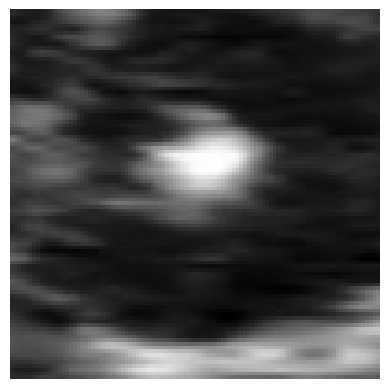

In [17]:
# check video

if d_plt_check:

    if video_d:fig_lib.vid_show(input_d[rec_check]['image'],t_btw_frm=t_btw_frm)
    else:fig_lib.im_show(input_d[rec_check]['image'])



# CNN

### GENERATE TRAIN DATA

In [18]:
# X_train,Y_train

if load_train_data: 
      
    with open(pkl_train_p, 'rb') as pikle_file:

        save_trains= pickle.load(pikle_file)

    X_train,Y_train =  save_trains[0],save_trains[1]

else:

    if video_d:X_train,Y_train,max_frm_n,HEIGHT, WIDTH =CNN_lib.vid_d_bin_gen(input_d, zero=0, one= 1)
    else:X_train,Y_train =CNN_lib.im_d_bin_gen(input_d,zero='circle', one= 'line')

    save_trains=[X_train,Y_train]

    with open(pkl_train_p, 'wb') as pikle_file:
            
            pickle.dump(save_trains, pikle_file)



In [19]:
end_time = time.time()

process_time = end_time - init_time
print(f"Tiempo transcurrido: {process_time} segundos")

Tiempo transcurrido: 86.76771473884583 segundos
